# Testeando el Parámetro de Exploración

In [1]:
!nvidia-smi

Tue Dec 06 08:43:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce 940MX      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8    N/A /  N/A |     37MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import math
import random
from collections import namedtuple, deque
from itertools import count, product
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from src.models.EnvironmentCachos import NPC, Strategic_NPC, AmbienteCacho
from src.models.Agents import AgentTable, Agent, Agent_SARSA, Agent_QLearning
from src.models.utils import train_over_games, play_one_game, plot_winrate, winrate_every, plot_time_per_game, Q_plot, plot_epsilon, plot_multi

# Evolución del WinRate en función del Epsilon

In [11]:
def fixed_combo(game_env, n_games, every, epsilon0, epsdecay, epsmin, mode):
    gamma = 0.99
    lr = 0.1
    agente_QLearning = Agent_QLearning(gamma = gamma, epsilon = epsilon0, lr = lr, game_env = game_env, eps_end = epsmin, eps_dec = epsdecay, eps_method = mode, name =  "Agente QLearning")
    scores, eps_hist, times = train_over_games(game_env, agente_QLearning, n_games, mode = "1-step", verbose = False)
    agente_QLearning.save_table(project_path+"/models/QTable_mode_{}_eps0_{}_epsdec_{}_epsmin_{}".format(mode, epsilon0, epsdecay, epsmin))
    return scores, eps_hist, times

def explore_epsilon(combis, mode = "Lineal", sett=0):
    n_games = 100000
    every = n_games//100
    game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)
    scores_dict = {"x": every* np.arange(n_games//every)}
    times_dict = {"x": np.arange(n_games)}
    epsilon_dict = {"x": np.arange(n_games)}
    for i, (epsilon0, epsdecay, epsmin) in enumerate(combis): 
                    scores, eps_hist, times = fixed_combo(game_env, n_games, every, epsilon0, epsdecay, epsmin, mode)
                    scores_dict["{} (decay = {})".format(i+1, epsdecay)] = winrate_every(scores, every)
                    times_dict["{} (decay = {})".format(i+1, epsdecay)] = times
                    epsilon_dict["{} (decay = {})".format(i+1, epsdecay)] = eps_hist
    df_wr = pd.DataFrame(scores_dict)
    df_times = pd.DataFrame(times_dict)
    df_epsilons = pd.DataFrame(epsilon_dict)
    
    #Ploteos
    plot_winrate(df_wr, every, save = project_path+"/reports/figures/WR_mode_{}_games_{}_{}".format(mode, n_games, sett))
    plot_time_per_game(df_times, m = every, save = project_path+"/reports/figures/Time_mode_{}_games_{}_{}".format(mode, n_games, sett))
    print(df_times.mean())
    plot_epsilon(df_epsilons, m = every, metodo = mode, save = project_path+"/reports/figures/Epsilon_mode_{}_games_{}_{}".format(mode, n_games, sett))
    #plot_multi(df_wr, df_epsilons)

In [6]:
n_games = 10000
every = n_games//100
gamma = 0.99
epsilon0 = 1
epsdecay = 0.01
epsmin = 0.001
mode = "Lineal"
lr = 0.1
scores_dict = {"x": every* np.arange(n_games//every)}
times_dict = {"x": np.arange(n_games)}
epsilon_dict = {"x": np.arange(n_games)}
game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)

## Agente Tabular Entrenado con QLearning

In [7]:
agente_QLearning = Agent_QLearning(gamma = gamma, epsilon = epsilon0, lr = lr, game_env = game_env, eps_end = epsmin, eps_dec = epsdecay, eps_method = mode, name =  "Agente QLearning")
scores, eps_hist, times = train_over_games(game_env, agente_QLearning, n_games, mode = "1-step", verbose = False)
print(np.mean(scores))
scores_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = winrate_every(scores, every)
times_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = times
epsilon_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = eps_hist

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.91
Tiempo por iteración (promedio últimos 100 episodios): 0.008 s
----------------------------------------
Creando el Juego 101
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 201
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0016 s
----------------------------------------
Creando el Juego 301
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0015 s
----------------------------------------
Creando el Juego 401
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.001
Tiempo por iteración (promedio ú

----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.08
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 4101
Resultados Parciales:
Winrate (últimos 100 episodios): 0.08
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 4201
Resultados Parciales:
Winrate (últimos 100 episodios): 0.08
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 4301
Resultados Parciales:
Winrate (últimos 100 episodios): 0.04
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 4401
Resultados Parciales:
Winrate (últimos 100 episodios): 0.06
Epsilon actual: 0.001
Tiempo por iteración

----------------------------------------
Creando el Juego 8001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.14
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 8101
Resultados Parciales:
Winrate (últimos 100 episodios): 0.18
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0037 s
----------------------------------------
Creando el Juego 8201
Resultados Parciales:
Winrate (últimos 100 episodios): 0.14
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0031 s
----------------------------------------
Creando el Juego 8301
Resultados Parciales:
Winrate (últimos 100 episodios): 0.19
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0035 s
----------------------------------------
Creando el Juego 8401
Resultados Parciales:
Winrate (últimos 100 episodios): 0.16
Epsilon actual: 0.001
Tiempo por iteración

In [10]:
df_wr = pd.DataFrame(scores_dict)
df_times = pd.DataFrame(times_dict)
df_epsilons = pd.DataFrame(epsilon_dict)

<AxesSubplot:ylabel='Winrate'>

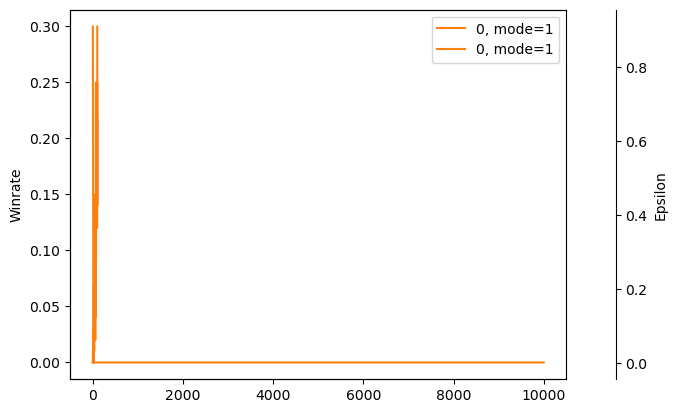

In [11]:
plot_multi(df_wr, df_epsilons)

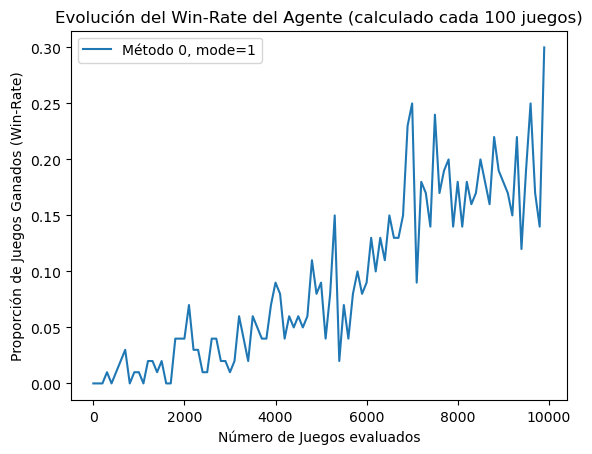

In [12]:
plot_winrate(df_wr, every, save = project_path+"/reports/figures/TEST_WR_mode_{}_games_{}".format(mode, n_games))

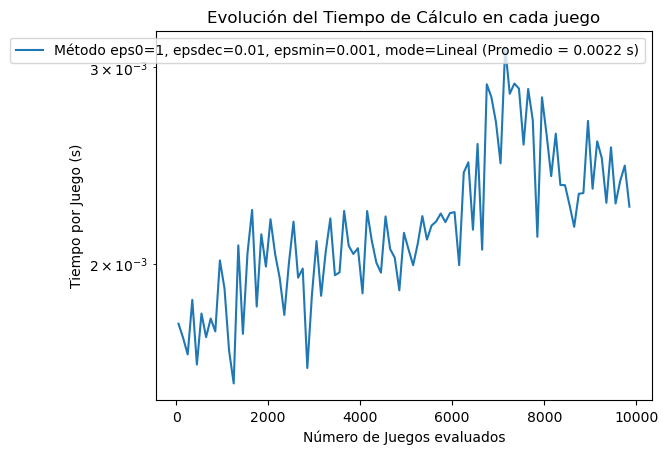

x                                                 4999.500000
eps0=1, epsdec=0.01, epsmin=0.001, mode=Lineal       0.002183
dtype: float64


In [16]:
plot_time_per_game(df_times, m = every)
print(df_times.mean())

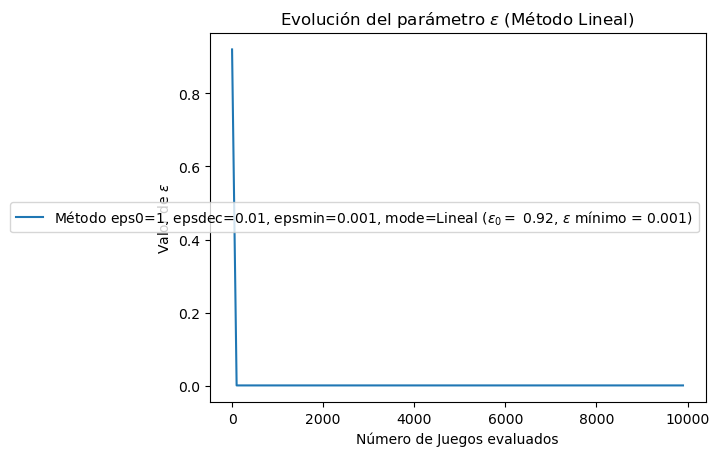

In [17]:
plot_epsilon(df_epsilons, m = every, metodo = "Lineal")

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9995
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.6271
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.1954
Tiempo por iteración (promedio últimos 100 episodios): 0.0016 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0017 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.0001
Tiempo por iteración (p

----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.004 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.7
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.64
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.68
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0001
Tiempo por 

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.84
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.84
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0032 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.87
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.89
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0001
Tiempo po

----------------------------------------
Creando el Juego 17001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.31
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 18001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.21
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.32
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.33
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.45
Epsilon actual: 0.0
Tiempo por iteración (pr

----------------------------------------
Creando el Juego 57001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.77
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.69
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0033 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.76
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.78
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0031 s
----------------------------------------
Creando el Juego 61001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.73
Epsilon actual: 0.0
Tiempo por iteración (pro

----------------------------------------
Creando el Juego 97001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.9
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 1.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9927
Tiempo por iteración (promedio ú

----------------------------------------
Creando el Juego 37001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.7128
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.7043
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.6956
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.6869
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.6782
Tiempo por 

----------------------------------------
Creando el Juego 76001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.13
Epsilon actual: 0.3148
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 77001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.13
Epsilon actual: 0.302
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.11
Epsilon actual: 0.2888
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.2
Epsilon actual: 0.2753
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.13
Epsilon actual: 0.2615
Tiempo por 

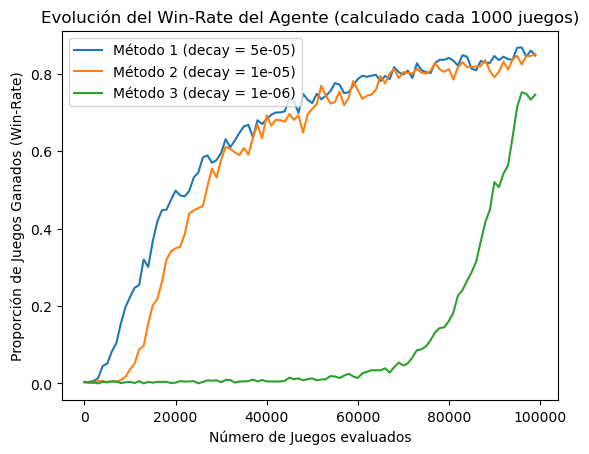

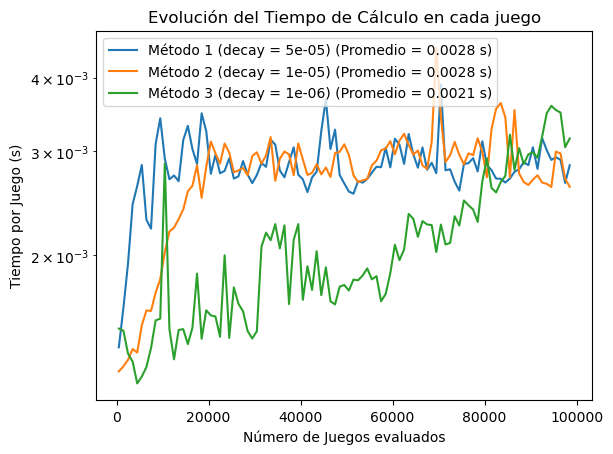

x                    49999.500000
1 (decay = 5e-05)        0.002830
2 (decay = 1e-05)        0.002756
3 (decay = 1e-06)        0.002085
dtype: float64


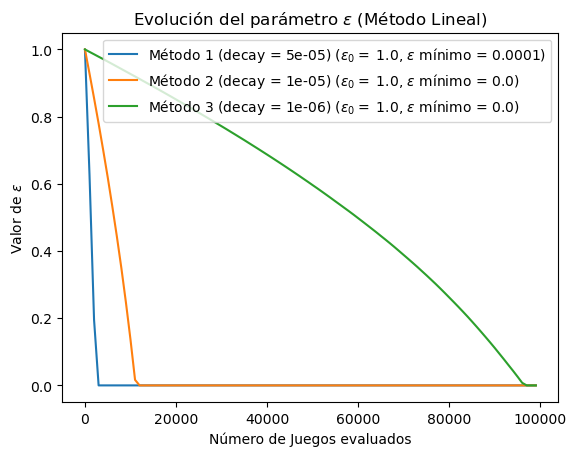

In [12]:
# eps0, epsdecay, epsmin
combis_L = [(1, 0.00005, 0.0001), (1, 0.00001, 0.00001), (1, 0.000001, 0.00001)]
explore_epsilon(combis_L, mode = "Lineal", sett = 1)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4999
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.03
Epsilon actual: 0.4199
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.3307
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.2353
Tiempo por iteración (promedio últimos 100 episodios): 0.0022 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.1307
Tiempo por iteración (pr

----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.66
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.63
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0032 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.69
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.58
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.64
Epsilon actual: 0.0001
Tiempo por

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.78
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0001
Tiempo po

----------------------------------------
Creando el Juego 18001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.43
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0031 s
----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.4
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.43
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.49
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 22001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.49
Epsilon actual: 0.0
Tiempo por iteración (pro

----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.73
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 61001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 62001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.76
Epsilon actual: 0.0
Tiempo por iteración (pro

----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.78
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4921
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4836
Tiempo por iteración (promedio

----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.56
Epsilon actual: 0.0477
Tiempo por iteración (promedio últimos 100 episodios): 0.0033 s
----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.55
Epsilon actual: 0.0303
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.65
Epsilon actual: 0.0129
Tiempo por iteración (promedio últimos 100 episodios): 0.0032 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.62
Epsilon actual: 0.0
Tiempo por iter

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.84
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0031 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0032 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.0
Tiempo por iteración (pr

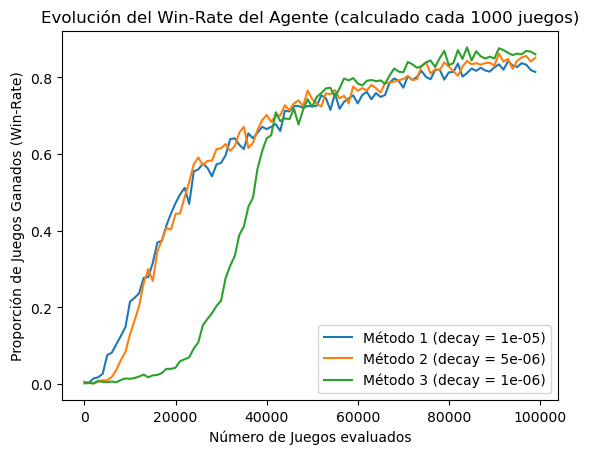

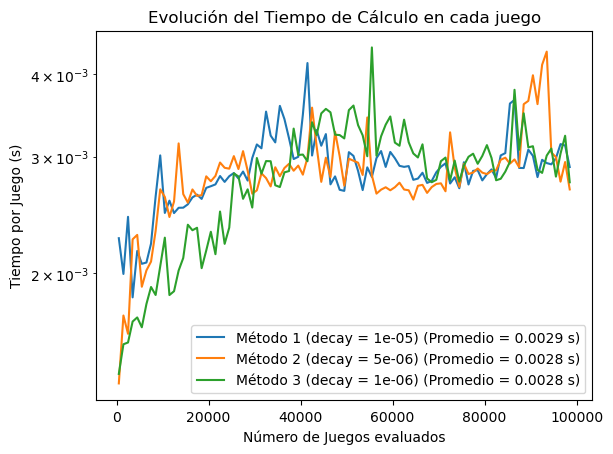

x                    49999.500000
1 (decay = 1e-05)        0.002861
2 (decay = 5e-06)        0.002818
3 (decay = 1e-06)        0.002801
dtype: float64


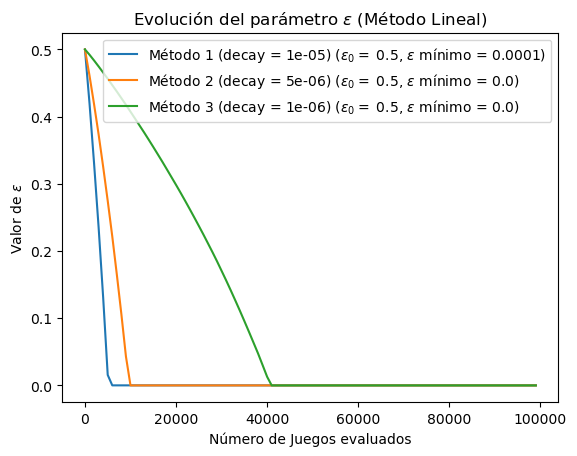

In [13]:
combis_L2 = [(0.5, 0.00001, 0.0001), (0.5, 0.000005, 0.00001), (0.5, 0.000001, 0.00001)]
explore_epsilon(combis_L2, mode = "Lineal", sett = 2)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9997
Tiempo por iteración (promedio últimos 100 episodios): 0.001 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.6922
Tiempo por iteración (promedio últimos 100 episodios): 0.0012 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.4646
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.2965
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.1807
Tiempo por iteración 

----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.63
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.61
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.66
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.67
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.65
Epsilon actual: 0.0001
Tiempo por

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.73
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.84
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0001
Tiempo po

----------------------------------------
Creando el Juego 17001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.2038
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 18001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.12
Epsilon actual: 0.1801
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.13
Epsilon actual: 0.1585
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.07
Epsilon actual: 0.139
Tiempo por iteración (promedio últimos 100 episodios): 0.0022 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.2
Epsilon actual: 0.1213
Tiempo por 

----------------------------------------
Creando el Juego 56001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.0004
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 57001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.0002
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.82
Epsilon actual: 0.0002
Tiempo por

----------------------------------------
Creando el Juego 96001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.94
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 97001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.89
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 1.0
Tiempo por iteración (promedi

----------------------------------------
Creando el Juego 36001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.7587
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 37001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.7525
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.7463
Tiempo por iteración (promedio últimos 100 episodios): 0.0016 s
----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.74
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.7338
Tiempo por iter

----------------------------------------
Creando el Juego 75001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.03
Epsilon actual: 0.5304
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 76001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.04
Epsilon actual: 0.5251
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 77001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.03
Epsilon actual: 0.5197
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.5144
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.5091
Tiempo por

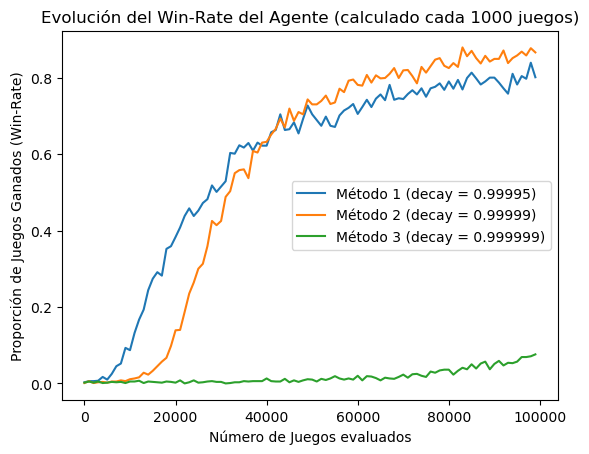

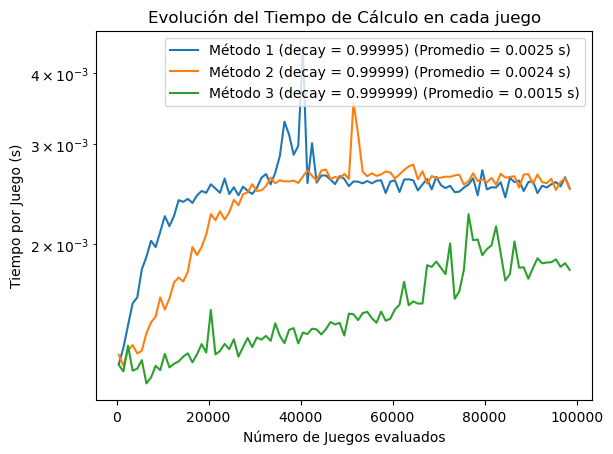

x                       49999.500000
1 (decay = 0.99995)         0.002494
2 (decay = 0.99999)         0.002398
3 (decay = 0.999999)        0.001542
dtype: float64


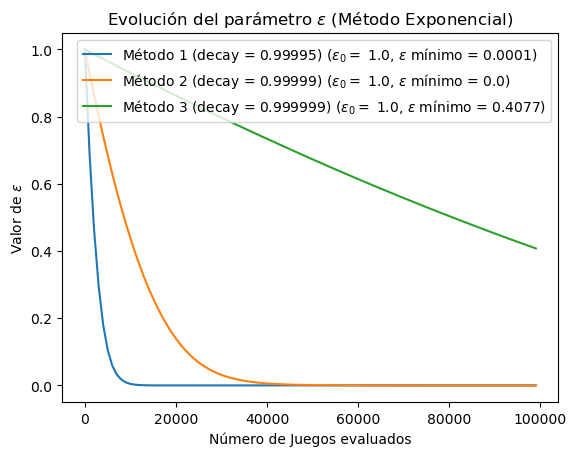

In [8]:
# eps0, epsdecay, epsmin
combis_E = [(1, 0.99995, 0.0001), (1, 0.99999, 0.00001), (1, 0.999999, 0.00001), ]
explore_epsilon(combis_E, mode = "Exponencial", sett = 1)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.462
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4243
Tiempo por iteración (promedio últimos 100 episodios): 0.0016 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.3877
Tiempo por iteración (promedio últimos 100 episodios): 0.0017 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.3524
Tiempo por iteración (promed

----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.73
Epsilon actual: 0.0017
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.71
Epsilon actual: 0.0014
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0012
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.58
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 44001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.67
Epsilon actual: 0.0008
Tiempo por

----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.82
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 83001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.0001
Tiempo por i

----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.15
Epsilon actual: 0.1801
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.18
Epsilon actual: 0.1682
Tiempo por iteración (promedio últimos 100 episodios): 0.0022 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.18
Epsilon actual: 0.1567
Tiempo por iteración (promedio últimos 100 episodios): 0.0022 s
----------------------------------------
Creando el Juego 22001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.31
Epsilon actual: 0.146
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 23001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.23
Epsilon actual: 0.1357
Tiempo por 

----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.0073
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0067
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0061
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 61001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0056
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 62001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.0052
Tiempo por 

----------------------------------------
Creando el Juego 97001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.9
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0002
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0002
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.001 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.4961
Tiempo por iteración 

----------------------------------------
Creando el Juego 37001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.08
Epsilon actual: 0.3392
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.12
Epsilon actual: 0.3351
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.1
Epsilon actual: 0.3311
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.11
Epsilon actual: 0.327
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.11
Epsilon actual: 0.323
Tiempo por it

----------------------------------------
Creando el Juego 76001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.4
Epsilon actual: 0.1972
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 77001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.47
Epsilon actual: 0.1942
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.43
Epsilon actual: 0.1912
Tiempo por iteración (promedio últimos 100 episodios): 0.0036 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.42
Epsilon actual: 0.1883
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.45
Epsilon actual: 0.1854
Tiempo por

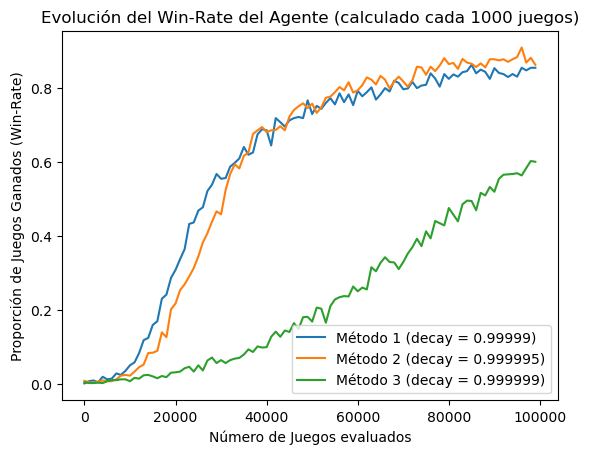

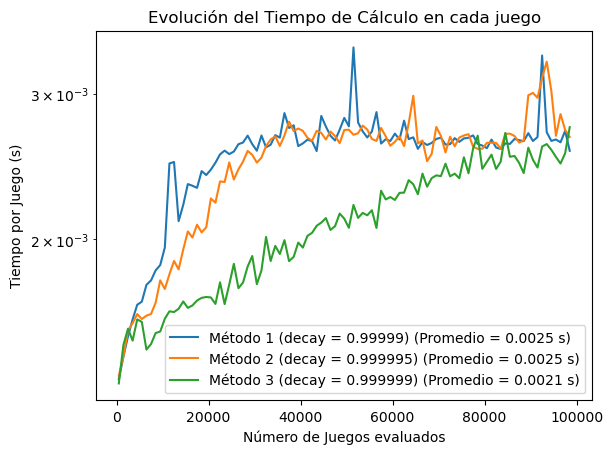

x                       49999.500000
1 (decay = 0.99999)         0.002525
2 (decay = 0.999995)        0.002477
3 (decay = 0.999999)        0.002095
dtype: float64


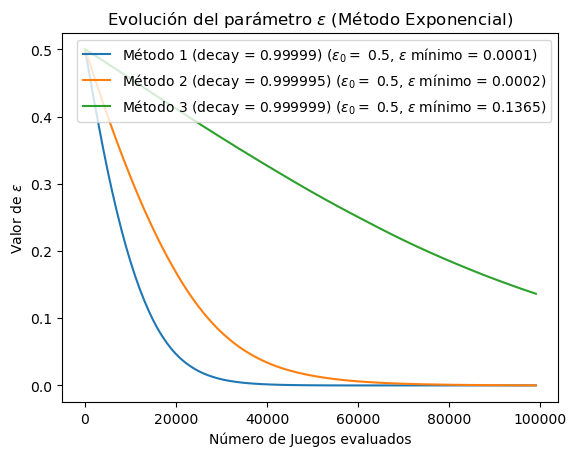

In [9]:
combis_E2 =[(0.5, 0.99999, 0.0001), (0.5, 0.999995, 0.00001), (0.5, 0.999999, 0.00001)]
explore_epsilon(combis_E2, mode = "Exponencial", sett = 2)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9996
Tiempo por iteración (promedio últimos 100 episodios): 0.0133 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.6923
Tiempo por iteración (promedio últimos 100 episodios): 0.0011 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4643
Tiempo por iteración (promedio últimos 100 episodios): 0.0013 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.2942
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.03
Epsilon actual: 0.1792
Tiempo por iteración

----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.51
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.58
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.66
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0051 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.66
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.67
Epsilon actual: 0.0001
Tiempo por

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.82
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.87
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0001
Tiempo por

----------------------------------------
Creando el Juego 17001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.05
Epsilon actual: 0.2055
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 18001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.04
Epsilon actual: 0.1814
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.05
Epsilon actual: 0.1594
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.09
Epsilon actual: 0.1396
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.15
Epsilon actual: 0.1218
Tiempo por 

----------------------------------------
Creando el Juego 56001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.77
Epsilon actual: 0.0004
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 57001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.72
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.0002
Tiempo por iteración (promedio últimos 100 episodios): 0.0064 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.89
Epsilon actual: 0.0002
Tiempo por

----------------------------------------
Creando el Juego 96001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.87
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 97001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.92
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.87
Epsilon actual: 0.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 1.0
Tiempo por iteración (promedi

----------------------------------------
Creando el Juego 36001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.24
Epsilon actual: 0.1617
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 37001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.22
Epsilon actual: 0.1504
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.2
Epsilon actual: 0.1399
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.4
Epsilon actual: 0.1298
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.33
Epsilon actual: 0.1202
Tiempo por 

----------------------------------------
Creando el Juego 75001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0062
Tiempo por iteración (promedio últimos 100 episodios): 0.0031 s
----------------------------------------
Creando el Juego 76001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.92
Epsilon actual: 0.0057
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 77001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.83
Epsilon actual: 0.0052
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0048
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0044
Tiempo por

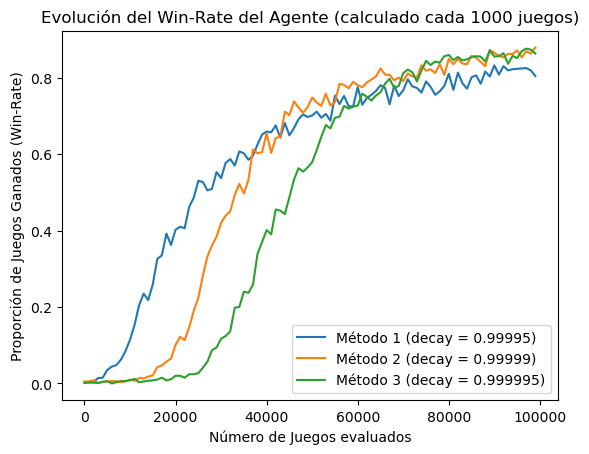

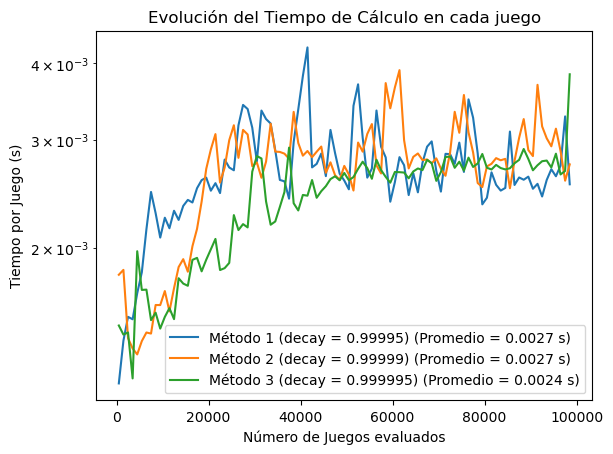

x                       49999.500000
1 (decay = 0.99995)         0.002678
2 (decay = 0.99999)         0.002678
3 (decay = 0.999995)        0.002416
dtype: float64


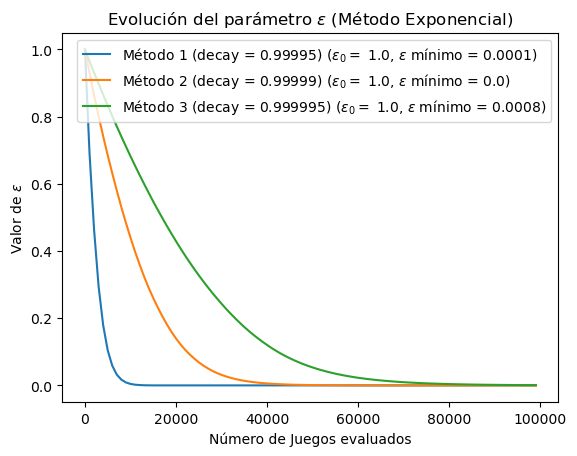

In [6]:
# eps0, epsdecay, epsmin
combis_E3 = [(1, 0.99995, 0.0001), (1, 0.99999, 0.00001), (1, 0.999995, 0.00001), ]
explore_epsilon(combis_E3, mode = "Exponencial", sett = 3)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.0 s
----------------------------------------
Creando el Juego 1001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.462
Tiempo por iteración (promedio últimos 100 episodios): 0.0015 s
----------------------------------------
Creando el Juego 2001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.4241
Tiempo por iteración (promedio últimos 100 episodios): 0.0013 s
----------------------------------------
Creando el Juego 3001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.01
Epsilon actual: 0.3873
Tiempo por iteración (promedio últimos 100 episodios): 0.0016 s
----------------------------------------
Creando el Juego 4001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.352
Tiempo por iteración (promed

----------------------------------------
Creando el Juego 39001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.72
Epsilon actual: 0.0019
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 40001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.69
Epsilon actual: 0.0016
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 41001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.6
Epsilon actual: 0.0013
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 42001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.72
Epsilon actual: 0.0011
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 43001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.7
Epsilon actual: 0.001
Tiempo por i

----------------------------------------
Creando el Juego 78001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.77
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0032 s
----------------------------------------
Creando el Juego 79001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 80001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 81001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0001
Tiempo por iteración (promedio últimos 100 episodios): 0.0033 s
----------------------------------------
Creando el Juego 82001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.85
Epsilon actual: 0.0001
Tiempo po

----------------------------------------
Creando el Juego 17001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.09
Epsilon actual: 0.2049
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 18001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.08
Epsilon actual: 0.1921
Tiempo por iteración (promedio últimos 100 episodios): 0.0037 s
----------------------------------------
Creando el Juego 19001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.13
Epsilon actual: 0.18
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 20001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.12
Epsilon actual: 0.1683
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 21001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.16
Epsilon actual: 0.1571
Tiempo por i

----------------------------------------
Creando el Juego 56001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.84
Epsilon actual: 0.0092
Tiempo por iteración (promedio últimos 100 episodios): 0.0034 s
----------------------------------------
Creando el Juego 57001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.78
Epsilon actual: 0.0084
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 58001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.82
Epsilon actual: 0.0077
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 59001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.0071
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 60001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.75
Epsilon actual: 0.0065
Tiempo po

----------------------------------------
Creando el Juego 95001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.9
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0038 s
----------------------------------------
Creando el Juego 96001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.87
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 97001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.9
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0035 s
----------------------------------------
Creando el Juego 98001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.91
Epsilon actual: 0.0003
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 99001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.91
Epsilon actual: 0.0002
Tiempo por 

----------------------------------------
Creando el Juego 34001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.38
Epsilon actual: 0.1482
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 35001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.34
Epsilon actual: 0.1415
Tiempo por iteración (promedio últimos 100 episodios): 0.0027 s
----------------------------------------
Creando el Juego 36001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.29
Epsilon actual: 0.1352
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 37001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.38
Epsilon actual: 0.1291
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 38001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.32
Epsilon actual: 0.1232
Tiempo po

----------------------------------------
Creando el Juego 73001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.78
Epsilon actual: 0.0206
Tiempo por iteración (promedio últimos 100 episodios): 0.0036 s
----------------------------------------
Creando el Juego 74001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.0195
Tiempo por iteración (promedio últimos 100 episodios): 0.0036 s
----------------------------------------
Creando el Juego 75001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.81
Epsilon actual: 0.0185
Tiempo por iteración (promedio últimos 100 episodios): 0.0035 s
----------------------------------------
Creando el Juego 76001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.77
Epsilon actual: 0.0176
Tiempo por iteración (promedio últimos 100 episodios): 0.0038 s
----------------------------------------
Creando el Juego 77001
Resultados Parciales:
Winrate (últimos 100 episodios): 0.86
Epsilon actual: 0.0167
Tiempo po

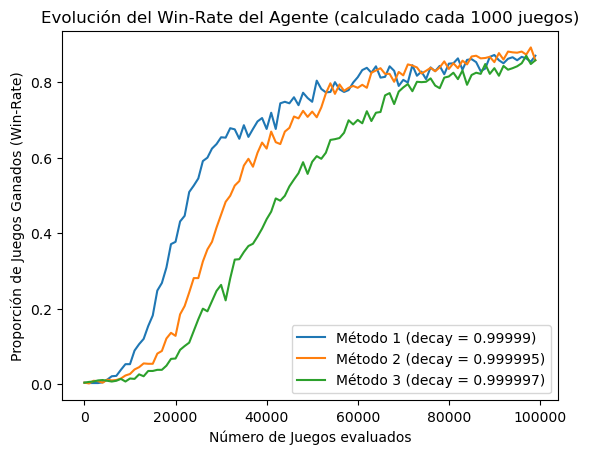

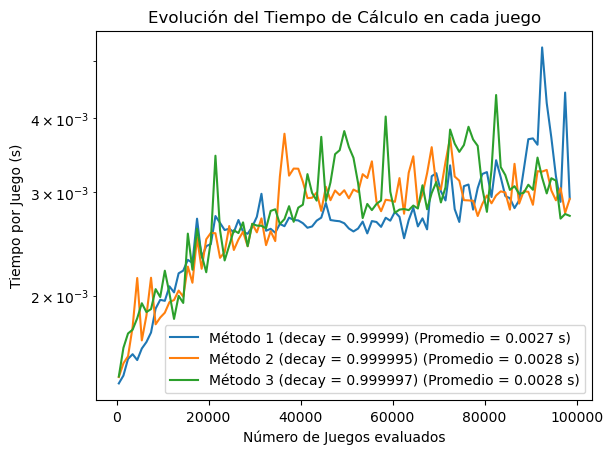

x                       49999.500000
1 (decay = 0.99999)         0.002710
2 (decay = 0.999995)        0.002755
3 (decay = 0.999997)        0.002826
dtype: float64


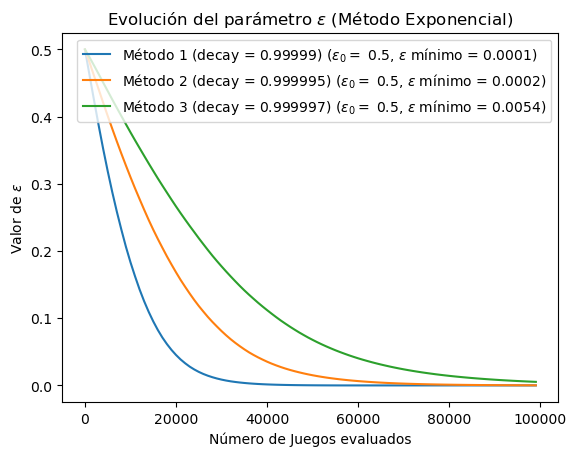

In [7]:
combis_E4 =[(0.5, 0.99999, 0.0001), (0.5, 0.999995, 0.00001), (0.5, 0.999997, 0.00001)]
explore_epsilon(combis_E4, mode = "Exponencial", sett = 4)

In [21]:
#agente_QLearning.load_table(project_path+"/models/QTable_mode_Lineal_eps0_1_epsdec_0.001_epsmin_0.001")
agente_QLearning.load_table(project_path+"/models/QTable_mode_Exponencial_eps0_1_epsdec_0.999_epsmin_0.001")

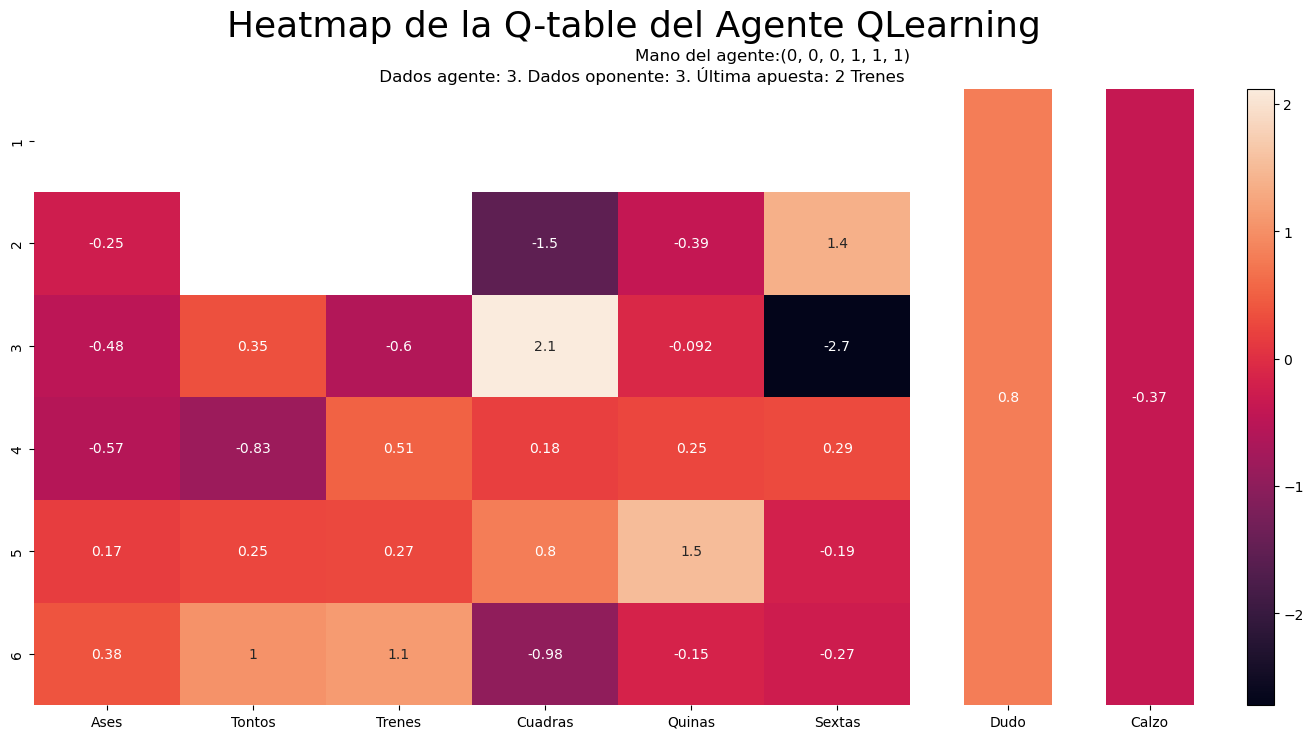

In [23]:
estado = ((0,0,0,1,1,1),(3,3), (2, "Trenes"))
Q_plot(agente_QLearning, estado)

# Guardando las Q_Tables asociadas a los agentes en archivos

In [14]:
#agente_MC.save_table(project_path+"/models/QTable_AgentMC")
#agente_SARSA.save_table(project_path+"/models/QTable_AgentSARSA")
#agente_QLearning.save_table(project_path+"/models/QTable_AgentQLearning")

# Visualización de las Q_Tables

## Cargando Modelos Preentrenados

In [15]:
agente_MC.load_table(project_path+"/models/QTable_AgentMC")
agente_SARSA.load_table(project_path+"/models/QTable_AgentSARSA")
agente_QLearning.load_table(project_path+"/models/QTable_AgentQLearning")

## Visualizando las tablas de reward por acción en un estado fijo

In [22]:
estado = ((0,0,0,1,1,1),(3,3), (2, "Trenes"))

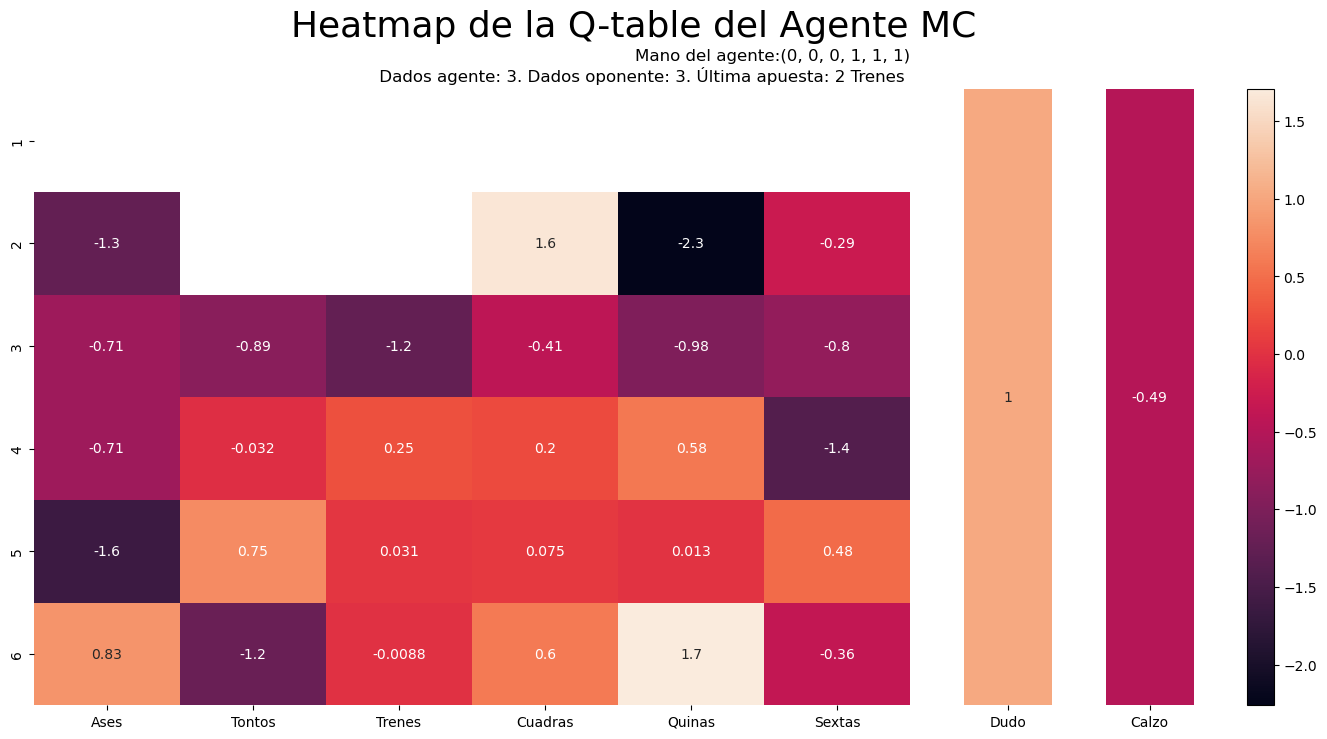

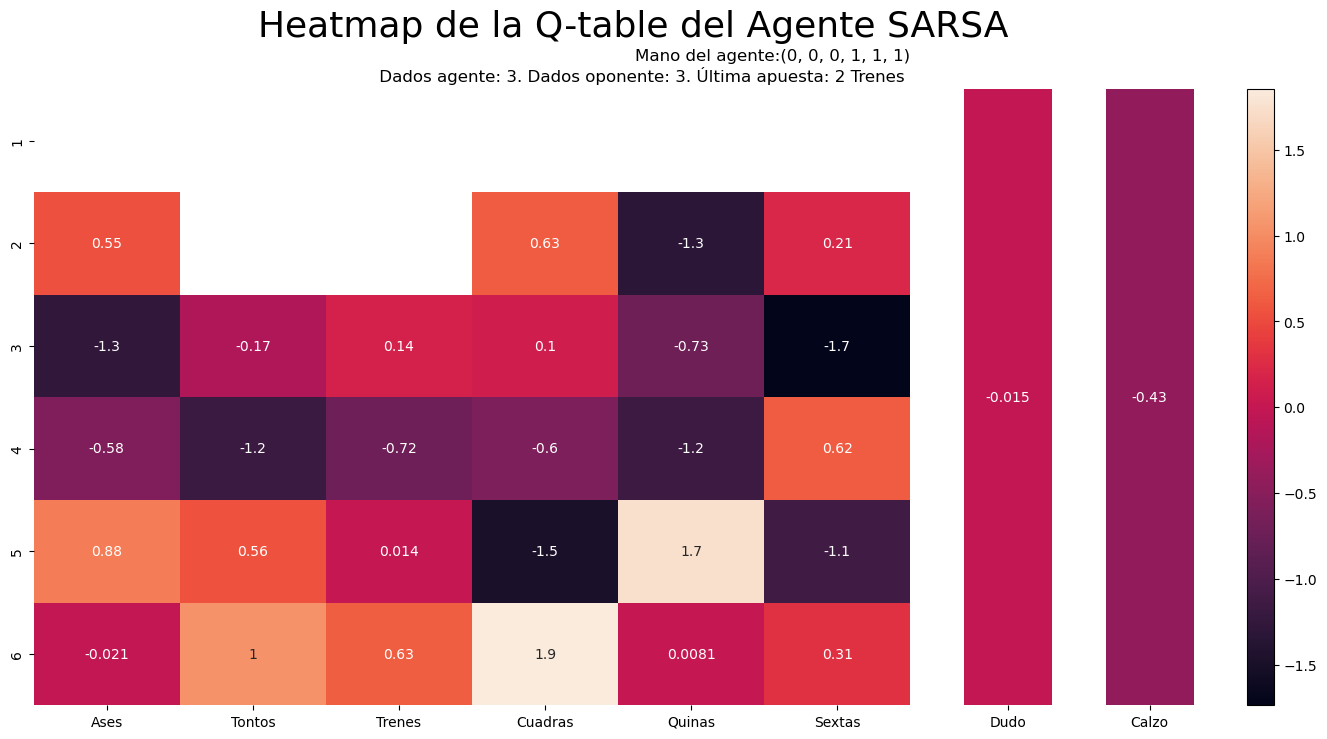

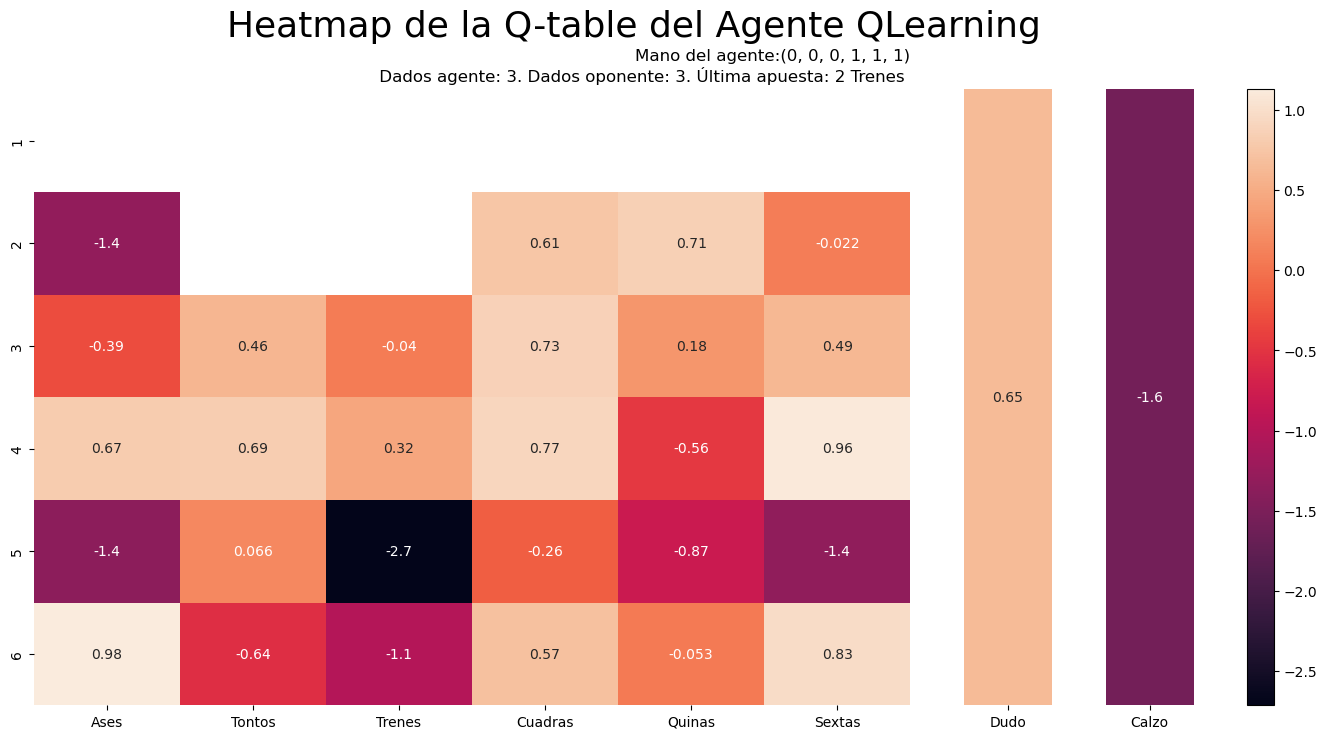

In [17]:
Q_plot(agente_MC, estado)
Q_plot(agente_SARSA, estado)
Q_plot(agente_QLearning, estado)

## Visión del agente al Jugar un Juego:

En esta ronda, los jugadores tenían los dados:
[array([0, 0, 1, 3, 0, 1]), array([0, 1, 0, 1, 1, 2])]


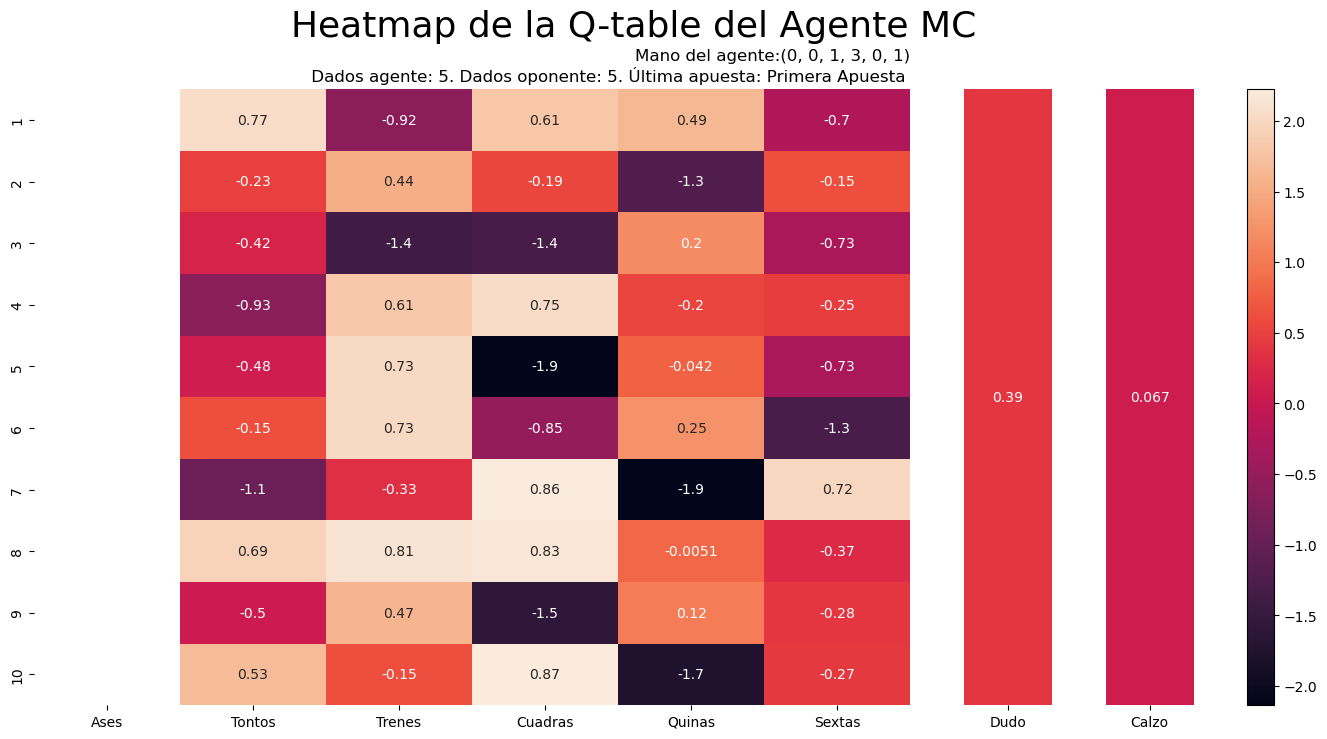

El Agente jugó (10, 'Cuadras')
Oponente 1 Played:  Dudo
-1 ('Oponente 1 Dudó bien', 0) (array([0, 0, 1, 3, 0, 1]), [4, 5], (10, 'Cuadras'))
--------------------------------------------------------------------------------
En esta ronda, los jugadores tenían los dados:
[array([0, 1, 1, 1, 0, 1]), array([0, 0, 0, 1, 3, 1])]


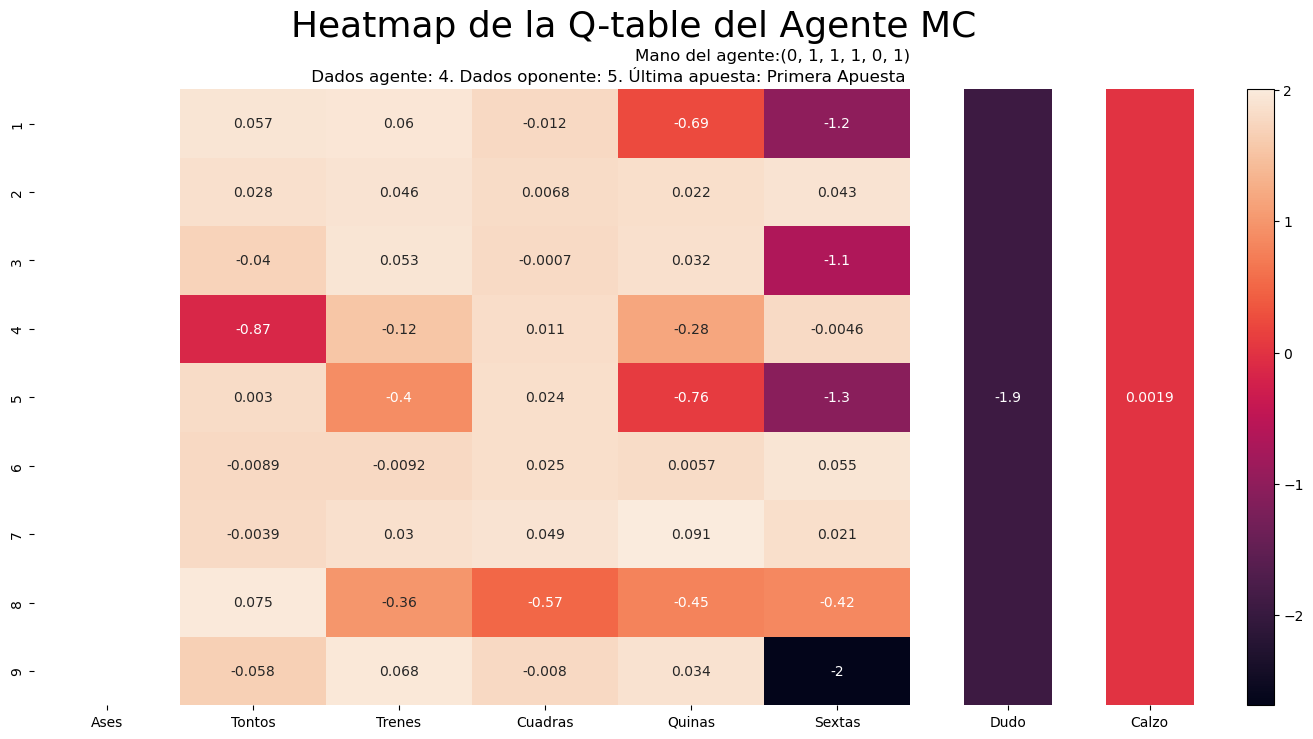

El Agente jugó (7, 'Quinas')
Oponente 1 Played:  Dudo
-1 ('Oponente 1 Dudó bien', 0) (array([0, 1, 1, 1, 0, 1]), [3, 5], (7, 'Quinas'))
--------------------------------------------------------------------------------
En esta ronda, los jugadores tenían los dados:
[array([1, 0, 2, 0, 0, 0]), array([0, 0, 0, 2, 2, 1])]


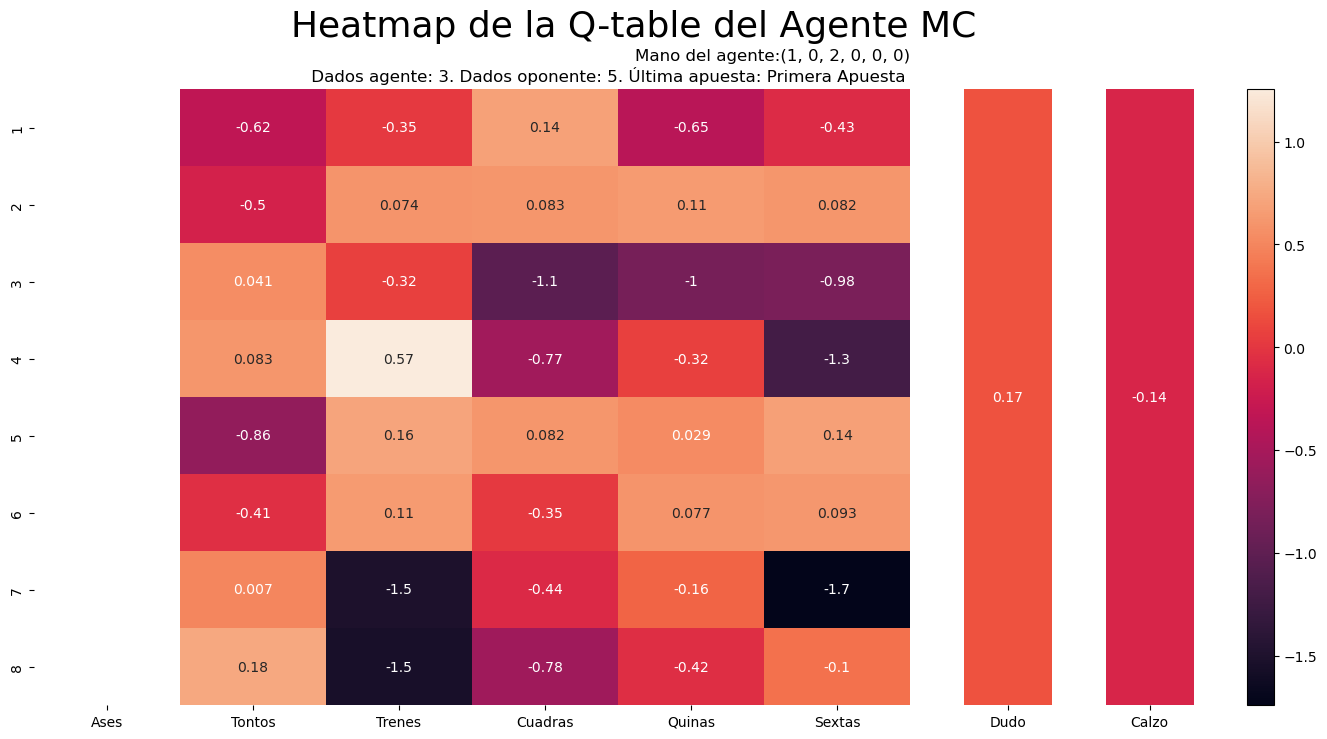

El Agente jugó (4, 'Trenes')
Oponente 1 Played:  Dudo
-1 ('Oponente 1 Dudó bien', 0) (array([1, 0, 2, 0, 0, 0]), [2, 5], (4, 'Trenes'))
--------------------------------------------------------------------------------
En esta ronda, los jugadores tenían los dados:
[array([0, 1, 1, 0, 0, 0]), array([0, 0, 4, 0, 1, 0])]


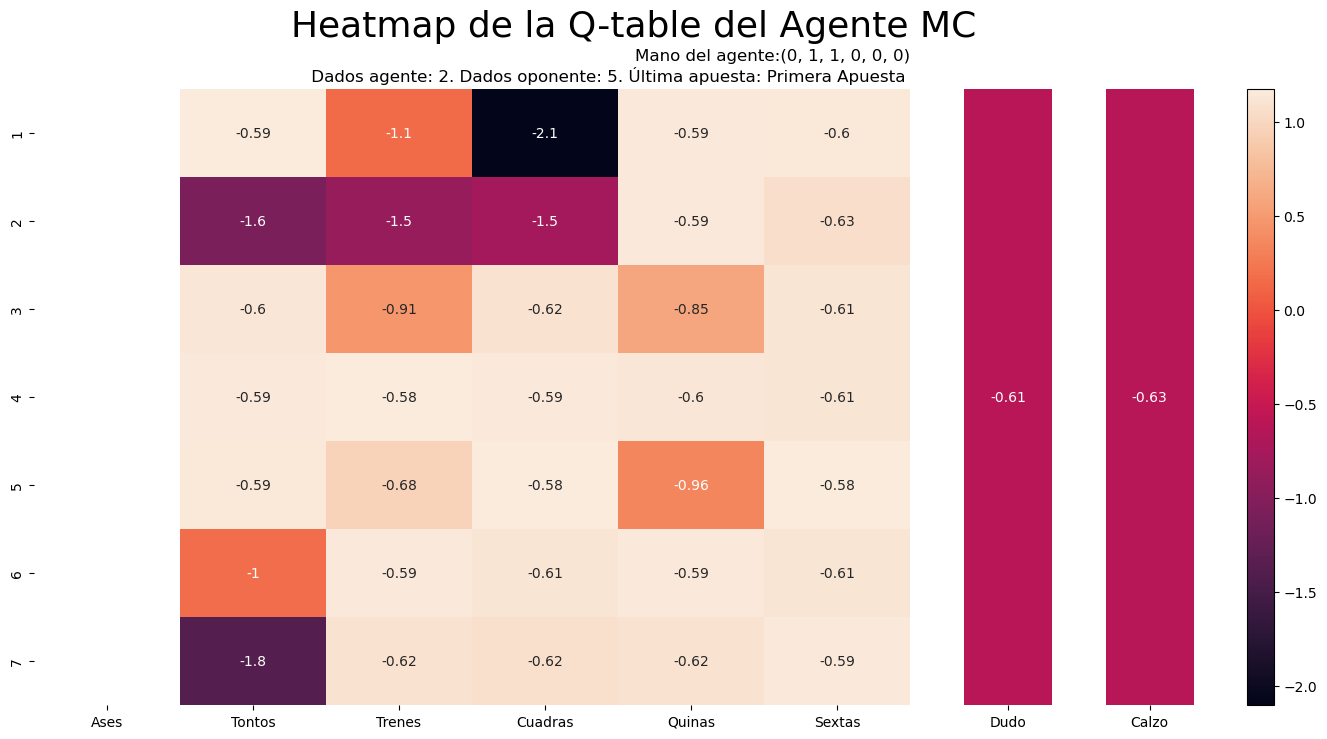

El Agente jugó (5, 'Sextas')
Oponente 1 Played:  Dudo
-1 ('Oponente 1 Dudó bien', 0) (array([0, 1, 1, 0, 0, 0]), [1, 5], (5, 'Sextas'))
--------------------------------------------------------------------------------
En esta ronda, los jugadores tenían los dados:
[array([0, 0, 1, 0, 0, 0]), array([1, 1, 1, 0, 0, 2])]


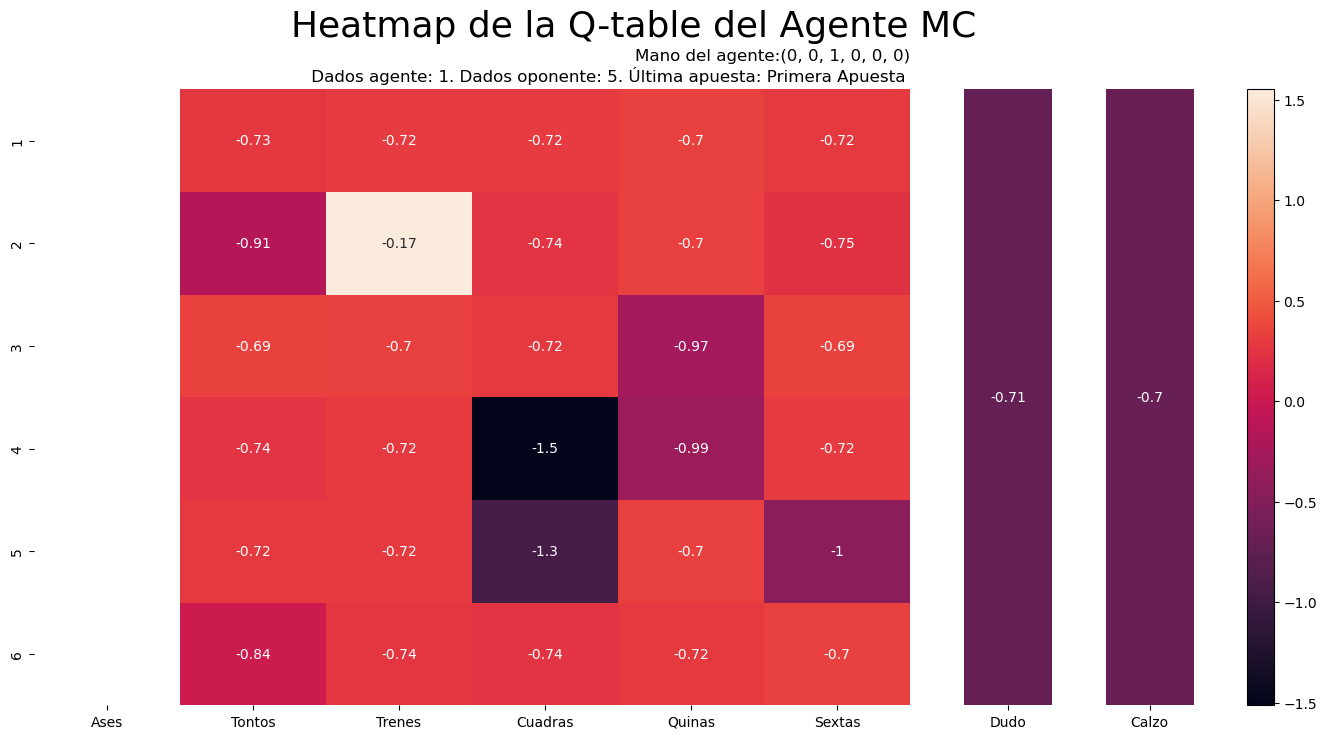

El Agente jugó (2, 'Trenes')
Oponente 1 Played:  (2, 'Sextas')


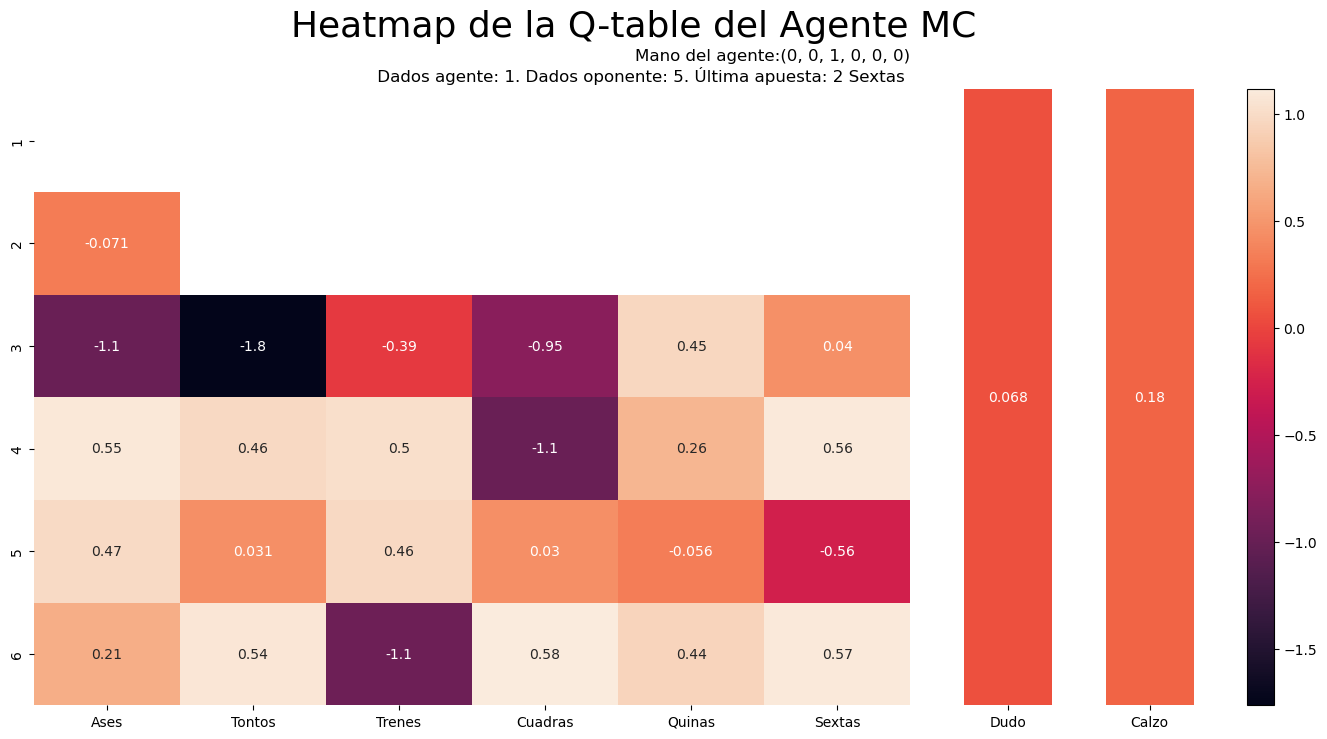

El Agente jugó (6, 'Cuadras')
Oponente 1 Played:  Dudo
OPPONENT WINS !
-1 ('Oponente 1 Dudó bien', 0) (array([0, 0, 1, 0, 0, 0]), [0, 5], (6, 'Cuadras'))
--------------------------------------------------------------------------------
Fin del Juego


(-1, 0.001, 4.3430041)

In [18]:
play_one_game(game_env, agente_MC, verbose = True, graphs = True, tabular = True)

# Uso de Deep QLearning

In [19]:
n_games = 1000
every = n_games//100
gamma = 0.99
epsilon0 = 1.
epsdecay = 1e-3
lr = 0.001
scores_dict = {"x": every* np.arange(n_games//every)}
times_dict = {"x": np.arange(n_games)}
epsilon_dict = {"x": np.arange(n_games)}
game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)

In [20]:
agente_DQN = Agent(gamma=gamma, epsilon=epsilon0, batch_size=64, game_env= game_env, eps_dec=epsdecay, eps_end=0.01, input_dims=[10], lr=lr)
print(agente_DQN.Q_eval)

DeepQNetwork(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=68, bias=True)
  (loss): MSELoss()
)


In [21]:
scores, eps_hist, times = train_over_games(game_env, agente_DQN, n_games, mode = "Deep", Target_Update = 10000, verbose = False)
print(np.mean(scores))
scores_dict["Deep QLearning"] = winrate_every(scores, every)
times_dict["Deep QLearning"] = times
epsilon_dict["Deep QLearning"] = eps_hist

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 1.0
Tiempo por iteración (promedio últimos 100 episodios): 0.005
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.984
Tiempo por iteración (promedio últimos 100 episodios): 0.0739
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.902
Tiempo por iteración (promedio últimos 100 episodios): 0.064
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.828
Tiempo por iteración (promedio últimos 100 episodios): 0.0603
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.753
Tiempo por iteración (promedio últimos 100 epi

----------------------------------------
Creando el Juego 411
Resultados Parciales:
Winrate (últimos 100 episodios): 0.74
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0758
----------------------------------------
Creando el Juego 421
Resultados Parciales:
Winrate (últimos 100 episodios): 0.76
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0759
----------------------------------------
Creando el Juego 431
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0745
----------------------------------------
Creando el Juego 441
Resultados Parciales:
Winrate (últimos 100 episodios): 0.79
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0769
----------------------------------------
Creando el Juego 451
Resultados Parciales:
Winrate (últimos 100 episodios): 0.8
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos

----------------------------------------
Creando el Juego 811
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0843
----------------------------------------
Creando el Juego 821
Resultados Parciales:
Winrate (últimos 100 episodios): 0.89
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0849
----------------------------------------
Creando el Juego 831
Resultados Parciales:
Winrate (últimos 100 episodios): 0.9
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.087
----------------------------------------
Creando el Juego 841
Resultados Parciales:
Winrate (últimos 100 episodios): 0.89
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 100 episodios): 0.0898
----------------------------------------
Creando el Juego 851
Resultados Parciales:
Winrate (últimos 100 episodios): 0.88
Epsilon actual: 0.01
Tiempo por iteración (promedio últimos 

In [22]:
df_wr = pd.DataFrame(scores_dict)
df_times = pd.DataFrame(times_dict)
df_epsilons = pd.DataFrame(epsilon_dict)

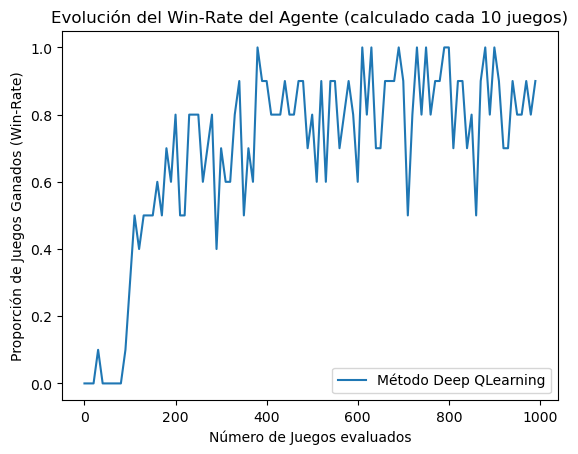

In [23]:
plot_winrate(df_wr, every)

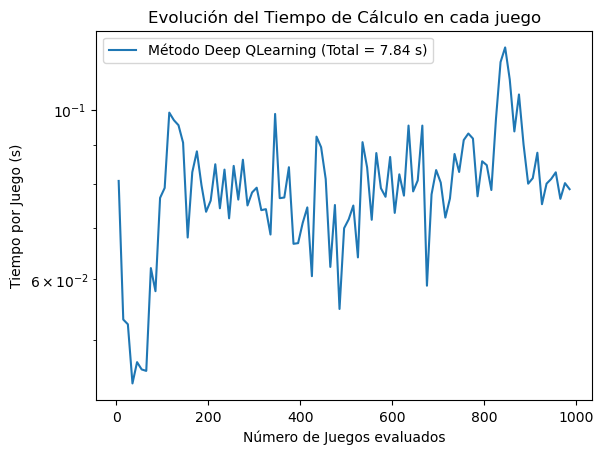

x                 499.500000
Deep QLearning      0.079124
dtype: float64


In [24]:
plot_time_per_game(df_times, m = every)
print(df_times.mean())

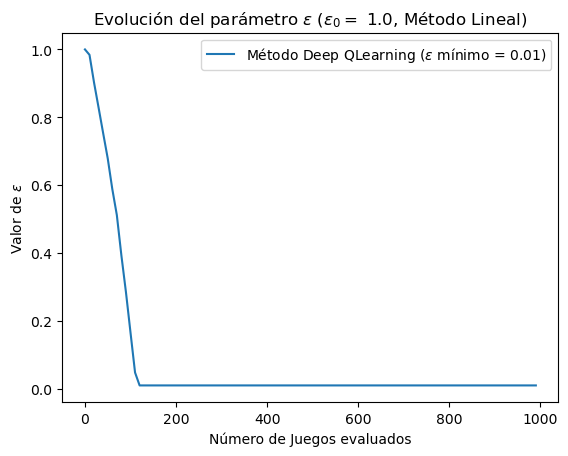

In [25]:
plot_epsilon(df_epsilons, m = every, metodo = "Lineal")

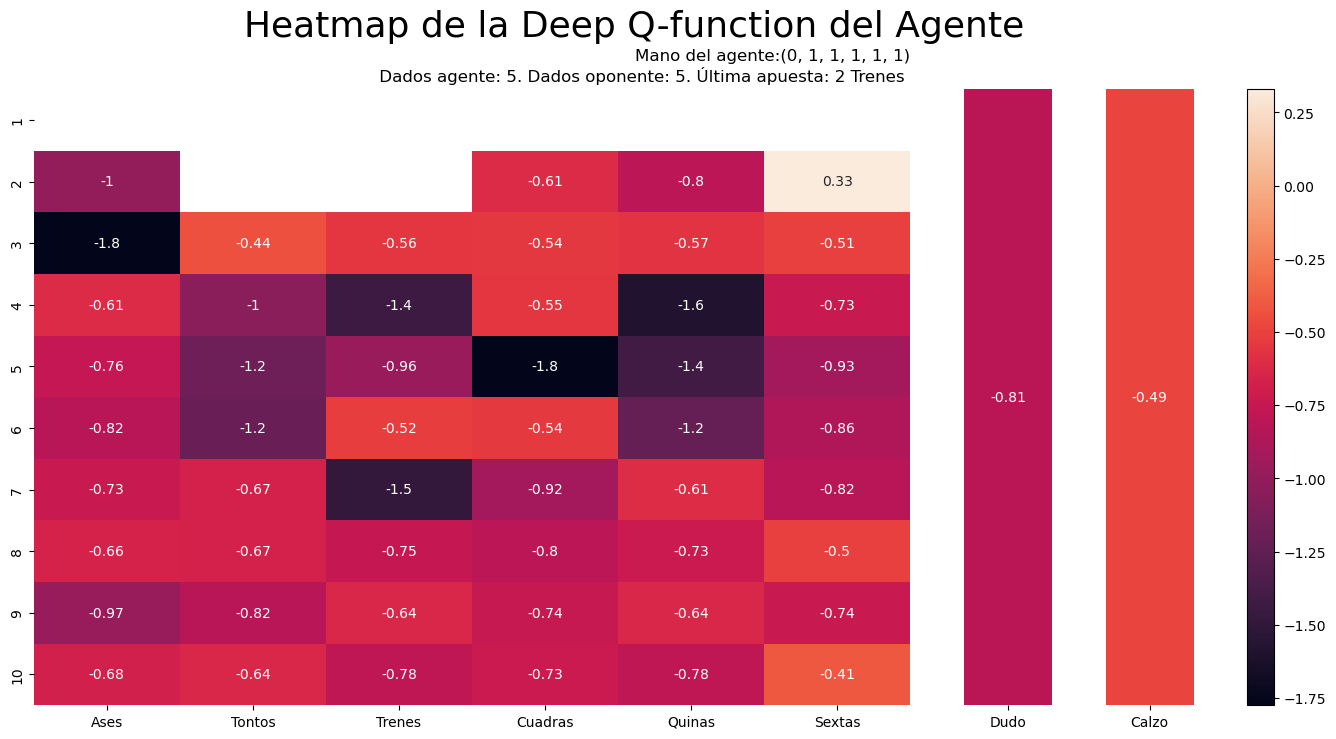

In [26]:
Q_plot(agente_DQN, ((0,1,1,1,1,1),(5,5), (2, "Trenes")), tabular = False)

In [27]:
#agente_DQN.save("..\\models\\QNetwork_{}eps_{}dec.pt".format(n_games, epsdecay))